<a href="https://colab.research.google.com/github/jqirko6/data-science/blob/main/Copy_of_TRAIN_YLC_Homework_7_STUDENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework \#7: Linear Regression Part I
---

In this homework, you will continue practicing your linear regression skills. There is also an optional part at the end to keep up with your KNN skills! This notebook is broken down into 3 parts as follows:

**Part 1**: Ideal Study Time

**Part 2**: Fish Market Prediction

**[OPTIONAL] Part 3**: Classify Fish using KNN

<br>

**Cheat Sheets**:

[Linear Regression with sklearn](https://docs.google.com/document/d/1fmIR5pvfxAFz_GGHun0dyE0CFWXe4_OWWeFRkZ1K13w/edit?usp=sharing)

[KNN Classification with sklearn](https://docs.google.com/document/d/1RqB0neapANsdy3Mku-AGHTpgQUbm2ZDt5hq2z1sMWpo/edit?usp=sharing)

---

## **Part 0: Import sklearn**
---

**Run the code below before continuing.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

## **Part 1: Ideal Study Time**
---

The dataset below contains the scores each student in a class achieved on a test and how long they studied for. Your goal will be to **predict the score** a student will receive if they study for a certain amount of time.

### **Step #1: Load in data**
---

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSBO43YMkbD_ipAijyNvlLRXtCC8yDdt1jadu92gPtL6K9F78c-hrZJPcPK0Vy_3pLQzcZScmoV31Gb/pub?gid=727890044&single=true&output=csv")
df.head()

,Hours,Scores
0,2.5,43
1,5.1,69
2,3.2,49
3,8.5,97
4,3.5,52


### **Steps #2 - 3: Decide our variables and split data into training and test sets**
---

We will use `Hours` as the inputs and `Scores` as the output.

In [ ]:
# since we're using so many features, it's easier to just specify which ones we're not using
inputs = df[["Hours"]]
output = df["Scores"]
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.2, random_state = 42)

**Standardize** the data before moving on. This is generally good practice.

In [ ]:
# Standardize our training and testing datasets
mu = X_train.mean()
sig = X_train.std()

X_train = (X_train - mu)/sig
X_test = (X_test - mu)/sig

### **Step #4: Import our model from sklearn**
---

In [ ]:
from sklearn.linear_model import LinearRegression

### **Step \#5: Initialize your model**
---

No hyperparameters for standard linear regression, so we just need to initialize the model.

In [ ]:
model = LinearRegression()

### **Step \#6: Fit your model on the training data**
---

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

### **Step \#7: Test your model**
---

Since the model that linear regression gives us is a line, we can easily visualize the predictions it makes. In particular, let's compare the true values versus the predicted values using a scatter plot. We will also plot a line showing what the perfect predictions would look like.

In [ ]:
predictions = model.predict(X_test)

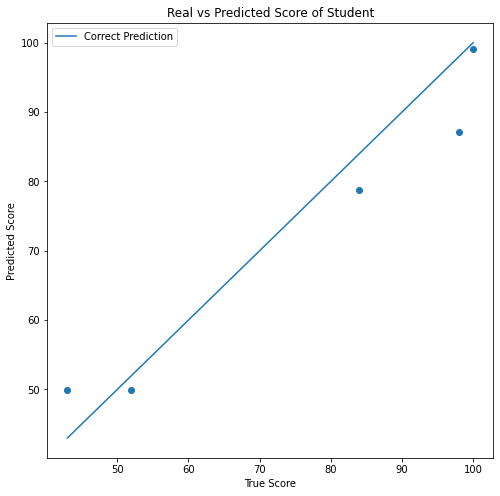

In [ ]:
# COMPLETE THIS CODE
plt.figure(figsize=(8,8))
plt.scatter(y_test , predictions)
plt.plot([y_test.min(), y_test.max()] ,[y_test.min(), y_test.max()], label = "Correct Prediction" )

plt.xlabel('True Score')
plt.ylabel('Predicted Score')
plt.title("Real vs Predicted Score of Student")
plt.legend()

plt.show()

### **Step \#8: Apply your model**
---

One student was out the day of the test and needs to make it up. They have to make up a lot of work, so they are hoping to study for only a short time. But, they are ready to study longer if they absolutely have to.

They would like you to predict their score for each of these three possibilites:

* Hours studying: 2
* Hours studying: 5.5
* Hours studying: 10

**1. Predict the score after studying for 2 hours**

In [ ]:
short_study = pd.DataFrame([[2]],
                         columns=X_test.columns)

short_study = (short_study - mu)/sig

model.predict(short_study)

array([45.66797936])

**2. Predict the score after studying for 5.5 hours**

In [ ]:
short_study = pd.DataFrame([[5.5]],
                         columns=X_test.columns)

short_study = (short_study - mu)/sig

model.predict(short_study)

array([75.32577404])

**3. Predict the score after studying for 10 hours**

In [ ]:
short_study = pd.DataFrame([[10]],
                         columns=X_test.columns)

short_study = (short_study - mu)/sig

model.predict(short_study)

array([113.45722433])

**4. How long to get an 85?**

The student looks over your predictions and decides they would like a little more information. In particular, they want to get around an 85% on the test and want to know how long to study for.

There are several ways you can answer this. The first is just plugging in numbers until you get an answer. For a relatively simple model with one straightforward feature like this, that isn't so bad. But imagine there were 100 features that were all quite complicated. We need a better way!

This is where inference comes in. If we can understand the general relationship between hours studying and the score, then we can answer a wider range of questions like this.

<br>

**In the space below, plot the Hours in the test data vs. the predictions and try to determine roughly how long this student should study to get an 85%.**

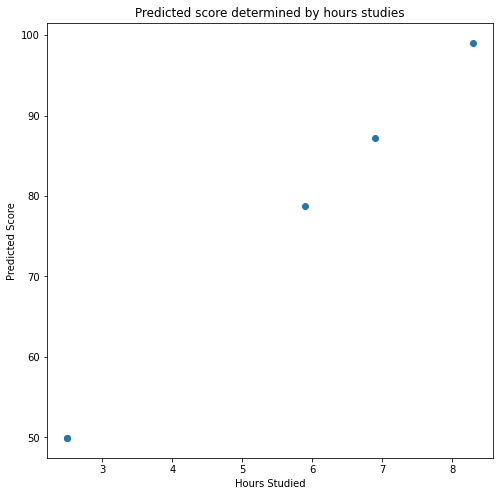

In [ ]:
hours = X_test["Hours"]
hours = hours * sig["Hours"] + mu["Hours"]

plt.figure(figsize=(8,8))
plt.scatter(hours, predictions)

plt.title("Predicted score determined by hours studies")
plt.xlabel("Hours Studied")
plt.ylabel("Predicted Score")
plt.show()

# COMPLETE THIS CODE

Based on this, it would seem studying for about 6.5 hours would be enough to get an 85%. Notice that there is very little test data, which makes this a bit hard to infer from or even trust. ML models work best when they can train and test with a lot of data.

## **Part 2: Fish Market Prediction**
---

In this part, you will go through the entire process from start to finish to create a linear regression model to **predict the price** of a fish based on its dimensions. This would be a very helpful tool for fishermen to understand the earnings they could expect based on the specific fish they catch.

The dataset contains the following columns:
* `Species`: a number indicating the type of fish this is. We will not use this column, unless you do the optional part 3.
* `Weight`: the weight (grams) of the fish
* `Length1`: the length (cm) from the mouth of the fish to the base of its tail
* `Length2`: the length (cm) from the mouth of the fish to the midpoint of its tail
* `Length3`: the length (cm) from the mouth of the fish to the end of its tail
* `Height`: the height (cm) of the fish (top to bottom)
* `Width`: the width (cm) of the fish (side to side)
* `Price`: the price (usd) that the fish went for in the market

### **Step #1: Load in data**
---

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT342QqDNoUfenF4SJIj9suKMtgIleUhRxMxrVby_zLizSukNo4fypg7CdlISCo43YLpETK5tNxTKkw/pub?gid=1196956673&single=true&output=csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Price
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200,64.00
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056,77.52
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961,67.60
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555,87.44
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340,90.00


### **Steps #2 - 3: Decide our variables and split data into training and test sets**
---

We will drop the `Species` column since this is categorical and not going to work well with linear regression.

In [ ]:
# since we're using so many features, it's easier to just specify which ones we're not using
inputs = df.drop(columns = ["Species", "Price"] )
output = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.2, random_state = 42)

**Standardize** the data before moving on. This is generally good practice.

In [ ]:
# Standardize our training and testing datasets
mu = X_train.mean()
sig = X_train.std()

X_train = (X_train - mu)/sig
X_test = (X_test - mu)/sig

### **Step #4: Import our model from sklearn**
---

In [ ]:
from sklearn.linear_model import LinearRegression

### **Step \#5: Initialize your model**
---

No hyperparameters for standard linear regression, so we just need to initialize the model.

In [ ]:
model = LinearRegression()

### **Step \#6: Fit your model on the training data**
---

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

### **Step \#7: Test your model**
---

Since the model that linear regression gives us is a line, we can easily visualize the predictions it makes. In particular, let's compare the true values versus the predicted values using a scatter plot. We will also plot a line showing what the perfect predictions would look like.

In [ ]:
predictions = model.predict(X_test)

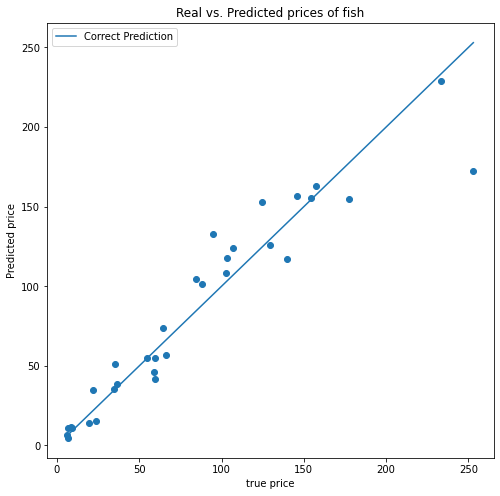

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()] ,[y_test.min(), y_test.max()], label = "Correct Prediction" )

plt.xlabel("true price")
plt.ylabel("Predicted price")
plt.title("Real vs. Predicted prices of fish")
plt.legend()

plt.show()

### **Step \#8: Apply your model**
---

A fisherman comes to you with the three different fish and wants to know what they should expect to make from selling these fish. Use your model to help them out!

**1. Predict the price of a fish with the following dimensions:**
* Weight: 264
* Length1: 26
* Length2: 28
* Length3: 31
* Height: 8.9
* Width: 4.4

In [ ]:
new_fish = pd.DataFrame([[264, 26, 28, 31, 8.0, 4.4]],
                         columns=X_test.columns)

new_fish = (new_fish - mu)/sig

model.predict(new_fish)

array([63.84777933])

**2. Predict the weight of a fish with the following dimensions:**
* Weight: 725
* Length1: 32.7
* Length2: 35.5
* Length3: 39.7
* Height: 12.4
* Width: 5.6

In [ ]:
new_fish = pd.DataFrame([[725, 32.7, 35.5, 39.7, 12.4, 5.6]],
                         columns=X_test.columns)

new_fish = (new_fish - mu)/sig

model.predict(new_fish)

array([127.32634877])

**3. Predict the weight of a fish with the following dimensions:**
* Weight: 120
* Length1: 19.1
* Length2: 21
* Length3: 23.2
* Height: 5.9
* Width: 3.4

In [ ]:
new_fish = pd.DataFrame([[120, 19.1, 21 , 23.2, 5.9, 3.4]],
                         columns=X_test.columns)

new_fish = (new_fish - mu)/sig

model.predict(new_fish)

array([30.4931516])

**4. Infer the relationship between Weight and Price**

Let's plot the Weight (the `Weight` column) from the test data (`X_test`) and see what our model predicted for these values. This way, we can get a sense of the relationship that our model claims to exist between this particular variable and the price of the fish.

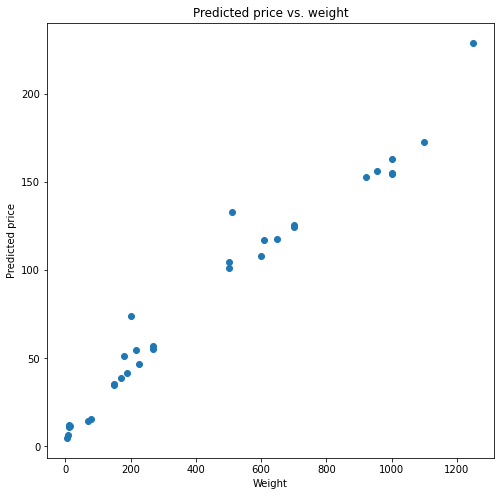

In [ ]:
weight = X_test["Weight"]
weight = weight * sig["Weight"] + mu["Weight"]

plt.figure(figsize=(8,8))
plt.scatter(weight, predictions)
plt.title('Predicted price vs. weight')
plt.xlabel("Weight")
plt.ylabel("Predicted price")

plt.show()
# COMPLETE THIS CODE

There is a clearly strong relationship learned by this linear regression model. As weight goes up, so does price. This makes sense after all!

**5. Infer the relationship between Height and Price**

Let's plot the Height (the `Height` column) from the test data (`X_test`) and see what our model predicted for these values. This way, we can get a sense of the relationship that our model claims to exist between this particular variable and the price of the fish.

Text(0, 0.5, 'Predicted price')

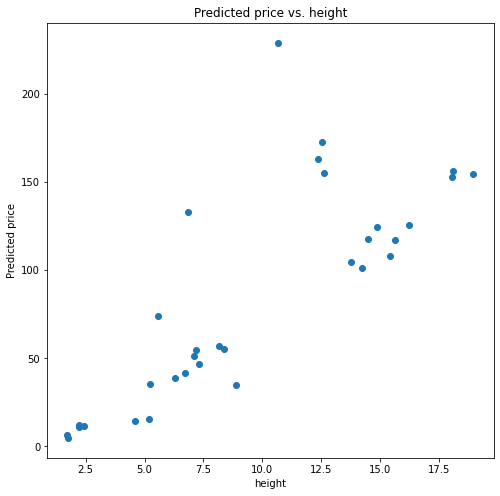

In [ ]:
height = X_test["Height"]
height = height * sig["Height"] + mu["Height"]

plt.figure(figsize=(8,8))
plt.scatter(height, predictions)
plt.title('Predicted price vs. height')
plt.xlabel("height")
plt.ylabel("Predicted price")

# COMPLETE THIS CODE

There is also a similar trend here unsurprisingly, but notice that there are more outliers.

## **[OPTIONAL] Part 3: Classify Fish using KNN**
---

If you would like to practice your KNN skills, try using this very same data to classify the species of fish based on the other features.

### **Exercise #1: Select the 2 best features**

### **Exercise #2: Split data into training and test data**

**Standardize** the data before moving on. This is generally good practice.

### **Exercise #3: Train a KNN Classifier for several K values and pick the best one**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

#### **1. Train for K = 1**

Train a model with K = 1 and look at its accuracy and confusion matrix.

#### **2. Train for K = 100**

Train a model with K = 100 and look at its accuracy and confusion matrix.

#### **3. Train for your choice of K**

Train a model with a K of your choice, specifically using some of the rules of thumb we've seen for choosing this hyperparameter, and look at its accuracy and confusion matrix.

---

# © 2022 The Coding School, All rights reserved